In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import phik
from phik.report import plot_correlation_matrix
from phik import report

from pathlib import Path

In [2]:
pd.options.display.float_format = '{:,.2f}'.format
# plt.style.use('dark_background')
sns.set_theme(style="whitegrid", palette="muted")
sns.color_palette()

[(0.2823529411764706, 0.47058823529411764, 0.8156862745098039),
 (0.9333333333333333, 0.5215686274509804, 0.2901960784313726),
 (0.41568627450980394, 0.8, 0.39215686274509803),
 (0.8392156862745098, 0.37254901960784315, 0.37254901960784315),
 (0.5843137254901961, 0.4235294117647059, 0.7058823529411765),
 (0.5490196078431373, 0.3803921568627451, 0.23529411764705882),
 (0.8627450980392157, 0.49411764705882355, 0.7529411764705882),
 (0.4745098039215686, 0.4745098039215686, 0.4745098039215686),
 (0.8352941176470589, 0.7333333333333333, 0.403921568627451),
 (0.5098039215686274, 0.7764705882352941, 0.8862745098039215)]

In [3]:
WORK_DIR = 'working_data'
FILE_NAME = 'df_work_ds_final.zip'

In [4]:
filepath = Path(f'./{WORK_DIR}/{FILE_NAME}')
df = pd.read_csv(filepath, index_col=0, parse_dates=True)

In [5]:
columns_drop = [
    "Fel_1",
    "Fel_2",
    "D_SL",
    "O2_tot",
    "Sl_tot",
    "AC_rbk_open",
    "AC_valve_open",
    "P_O2_in",
    # "P_tot_2",
    "FT1_level",
    "FT1_P",
    "FT1_T_in",
    "FT1_T",
    "FT2_level",
    "FT2_P",
    "FT2_T",
    "Cond_Q",
    "Cond_level",
    "Cond_valve",
    "O2_conc_1",
    "O2_conc_2",
    'T_C1',
    'T_C2',
    'T_C3',
    'T_C4',
    'T_C5'
]

df.drop(columns_drop, inplace=True, axis=1)

Добавим для анализа сдвиги от 1 до 5 часов.

In [7]:
df['lag_1'] = df['Fe2+'].shift(1)
df['lag_2'] = df['Fe2+'].shift(2)
df['lag_3'] = df['Fe2+'].shift(3)
df['lag_4'] = df['Fe2+'].shift(4)
df['lag_5'] = df['Fe2+'].shift(5)

df.dropna(axis=0, inplace=True)

In [6]:
phik_overview = df.phik_matrix()

# phik_overview.round(2)

interval columns not set, guessing: ['QQ_C1', 'QQ_C2', 'QQ_C3', 'QQ_C4', 'QQ_C5', 'QQ_tot', 'O2_C1', 'O2_C2', 'O2_C3', 'O2_C4', 'O2_C5', 'AC_level', 'P_H2O', 'P_O2', 'P_tot', 'P_valve', 'T_abg', 'Fe', 'Stot', 'As', 'Corg', 'Ctot', 'Fe2+', 'D_S', 'D_SL_H', 'Fel_sum', 'C_S', 'Q_SL', 'G_S', 'G_Seq']


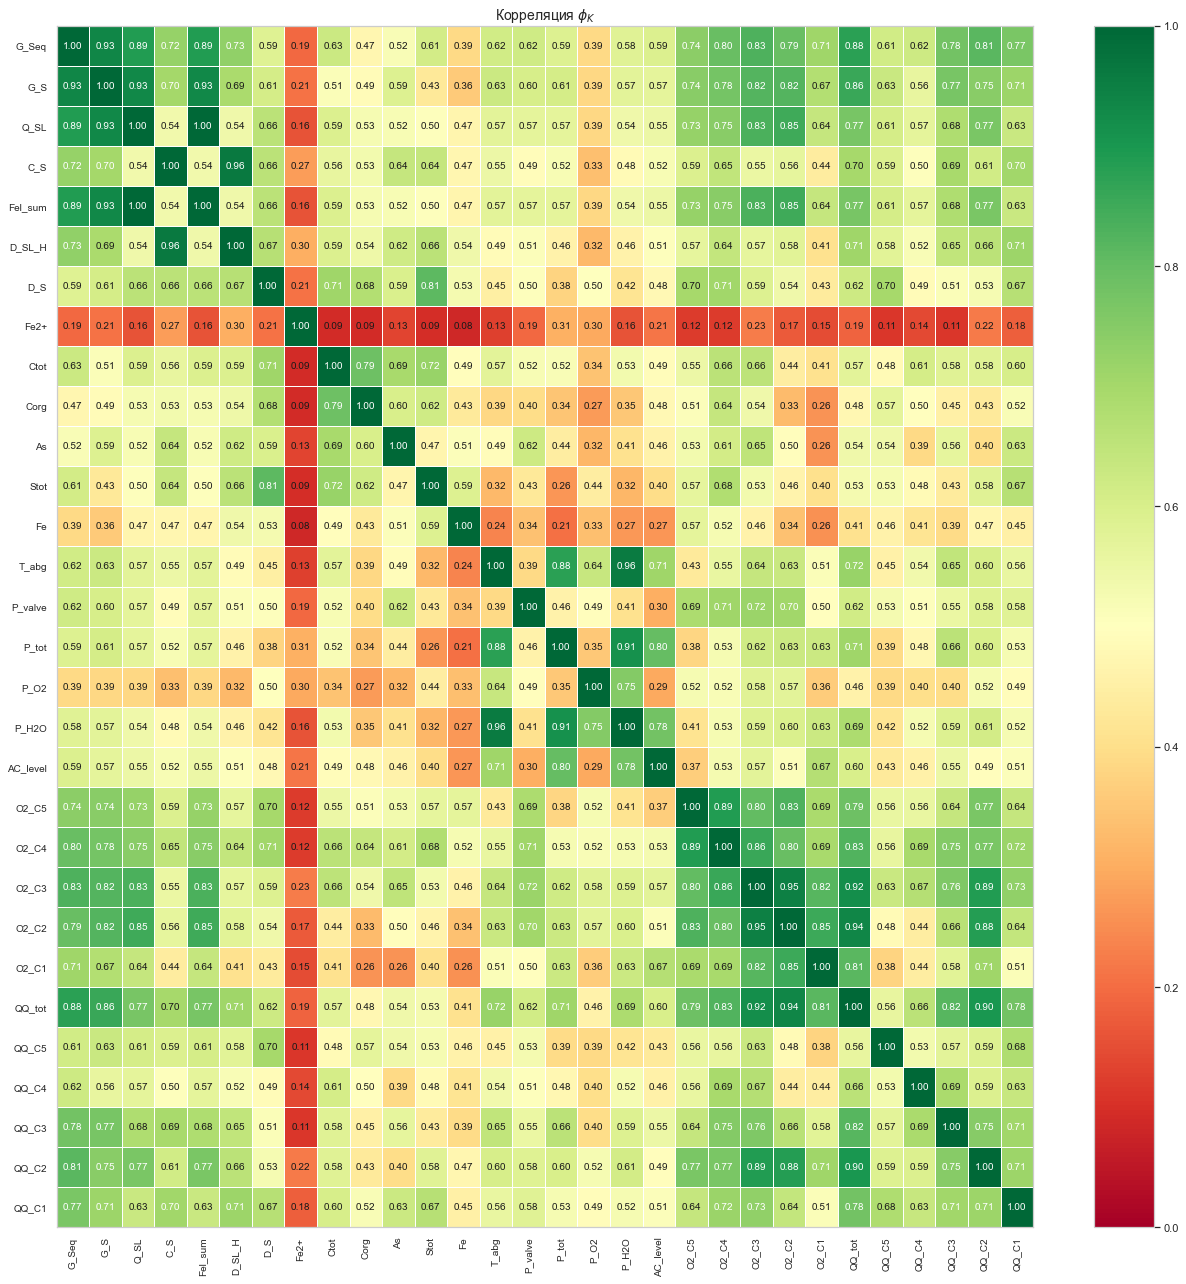

In [7]:
plot_correlation_matrix(phik_overview.values, 
                        x_labels=phik_overview.columns, 
                        y_labels=phik_overview.index, 
                        vmin=0, vmax=1,
                        title=r"Корреляция $\phi_K$", 
                        figsize=(18, 18))
plt.tight_layout()

In [13]:
phik_overview['Fe2+'].sort_values(ascending=False)[:10]

Fe2+       1.00
P_tot      0.31
D_SL_H     0.30
P_O2       0.30
C_S        0.27
O2_C3      0.23
QQ_C2      0.22
AC_level   0.21
D_S        0.21
G_S        0.21
Name: Fe2+, dtype: float64

interval columns not set, guessing: ['QQ_C1', 'QQ_C2', 'QQ_C3', 'QQ_C4', 'QQ_C5', 'QQ_tot', 'O2_C1', 'O2_C2', 'O2_C3', 'O2_C4', 'O2_C5', 'AC_level', 'P_H2O', 'P_O2', 'P_tot', 'P_valve', 'T_abg', 'Fe', 'Stot', 'As', 'Corg', 'Ctot', 'Fe2+', 'D_S', 'D_SL_H', 'Fel_sum', 'C_S', 'Q_SL', 'G_S', 'G_Seq', 'lag_1', 'lag_2', 'lag_3', 'lag_4', 'lag_5']


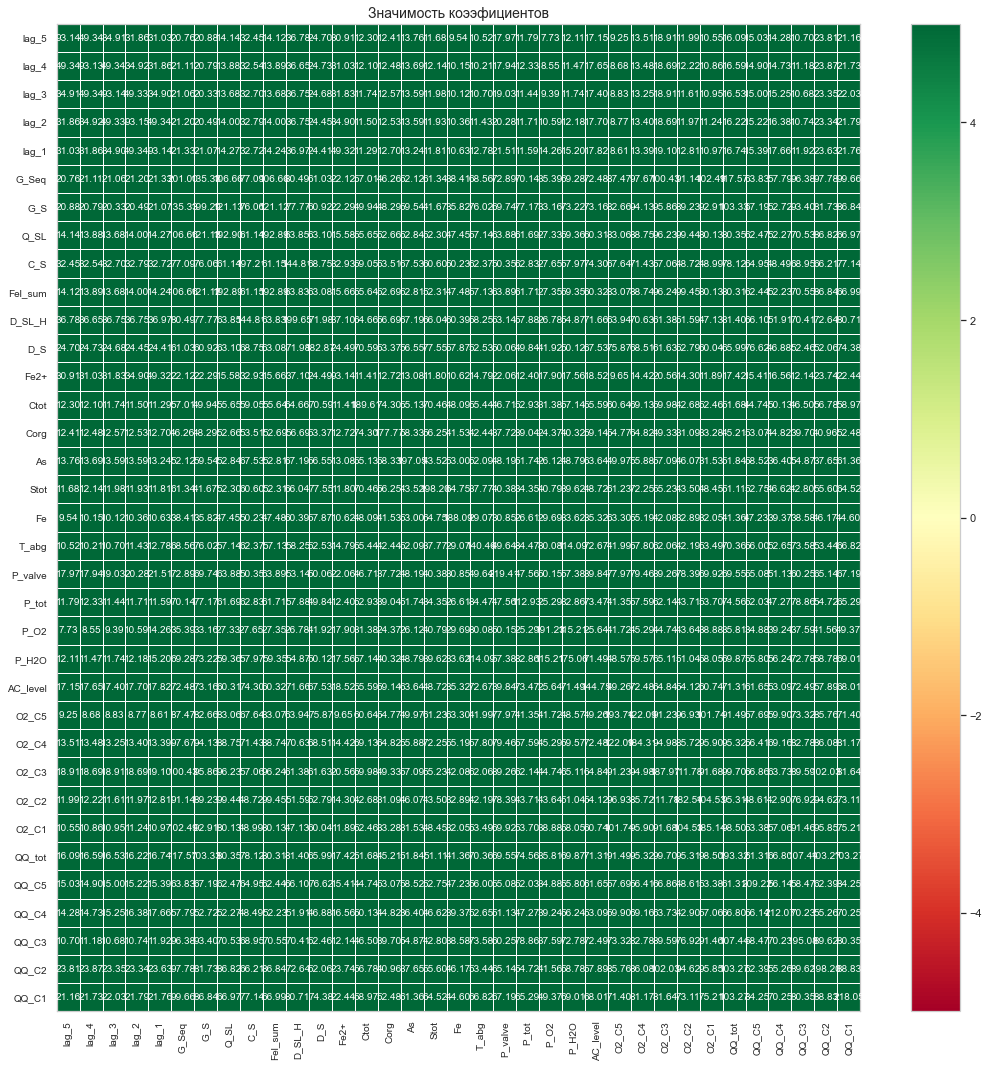

In [10]:
significance_overview = df.significance_matrix()

plot_correlation_matrix(significance_overview.fillna(0).values, 
                        x_labels=significance_overview.columns, 
                        y_labels=significance_overview.index, 
                        vmin=-5, vmax=5, title="Значимость коээфициентов", 
                        usetex=False, figsize=(18, 18))

plt.tight_layout()

interval columns not set, guessing: ['QQ_C1', 'QQ_C2', 'QQ_C3', 'QQ_C4', 'QQ_C5', 'QQ_tot', 'O2_C1', 'O2_C2', 'O2_C3', 'O2_C4', 'O2_C5', 'AC_level', 'P_H2O', 'P_O2', 'P_tot', 'P_valve', 'T_abg', 'Fe', 'Stot', 'As', 'Corg', 'Ctot', 'Fe2+', 'D_S', 'D_SL_H', 'Fel_sum', 'C_S', 'Q_SL', 'G_S', 'G_Seq', 'lag_1', 'lag_2', 'lag_3', 'lag_4', 'lag_5']


c:\Anaconda3\lib\site-packages\phik\phik.py:319: RuntimeWarning: invalid value encountered in sqrt
  global_correlations = np.sqrt(


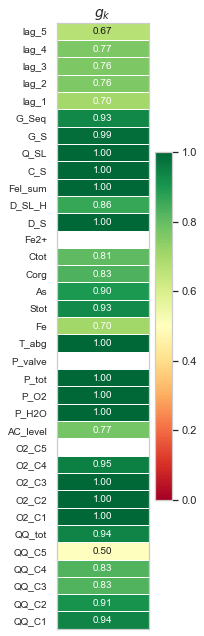

In [11]:
global_correlation, global_labels = df.global_phik()

plot_correlation_matrix(global_correlation, 
                        x_labels=[''], y_labels=global_labels, 
                        vmin=0, vmax=1, figsize=(3, 9),
                        title=r"$g_k$")
plt.tight_layout()